In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score,accuracy_score,recall_score,f1_score,classification_report,precision_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv('Zoo.csv')

In [3]:
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [4]:
df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
features=df.drop(['type','animal name'],axis=1)
features

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [7]:
target=df[['type']]
target

,type
0,1
1,1
2,4
3,1
4,1
...,...
96,1
97,6
98,1
99,7


In [8]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.8,random_state=100)

In [9]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(80, 16)
(21, 16)
(80, 1)
(21, 1)


In [10]:
knn=KNeighborsClassifier(n_neighbors=1)

In [11]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [12]:
y_pred = knn.predict(x_test)
y_pred

array([2, 4, 5, 1, 1, 5, 1, 2, 2, 2, 1, 6, 1, 5, 6, 1, 4, 1, 2, 2, 1],
      dtype=int64)

In [13]:
r2=r2_score(y_test,y_pred)
r2

0.9346811819595645

In [14]:
params= {'n_neighbors':[1,2,3,4,5,6,7,8,9,10]}

In [15]:
grid_search=GridSearchCV(knn,params)

In [16]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=1),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [17]:
grid_search.best_params_

{'n_neighbors': 1}

In [18]:
# Calculate precision, recall, and F1-score for each class
accuracy=accuracy_score(y_test, y_pred)
accuracy

0.9523809523809523

In [19]:
precision = precision_score(y_test, y_pred, average='weighted')
precision

0.9206349206349206

In [20]:
recall = recall_score(y_test, y_pred, average='weighted')
recall

0.9523809523809523

In [21]:
f1 = f1_score(y_test, y_pred, average='weighted')
f1

0.9333333333333333

In [22]:
print('r2 score:',r2)
print('accuracy score:',accuracy)
print('precision:',precision)
print('recall:',recall)
print('f1 score:',f1)

r2 score: 0.9346811819595645
accuracy score: 0.9523809523809523
precision: 0.9206349206349206
recall: 0.9523809523809523
f1 score: 0.9333333333333333


In [23]:
from sklearn.decomposition import PCA

In [24]:
# Using pca to create 2 new features
pca = PCA(n_components=2)
pca

PCA(n_components=2)

In [25]:
df_pca = pca.fit_transform(df.drop(columns=['type','animal name']))
x = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])

In [26]:
y=df['type']

In [27]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [28]:
knn=KNeighborsClassifier(n_neighbors=1)

In [29]:
knn.fit(x_scaled,y)

KNeighborsClassifier(n_neighbors=1)

In [30]:
x_min, x_max = x_scaled[:, 0].min()-1, x_scaled[:, 0].max()+1
y_min, y_max = x_scaled[:, 1].min()-1, x_scaled[:, 1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),np.arange(y_min, y_max, 0.01))

In [31]:
z=knn.predict(np.c_[xx.ravel(), yy.ravel()])
z=z.reshape(xx.shape)

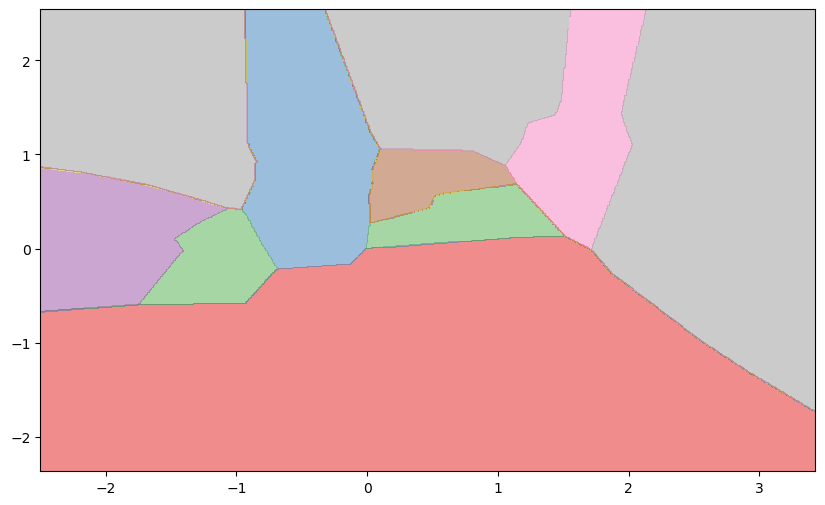

In [32]:
plt.figure(figsize=(10,6))
plt.contourf(xx,yy,z,alpha=0.5,cmap=plt.cm.Set1)

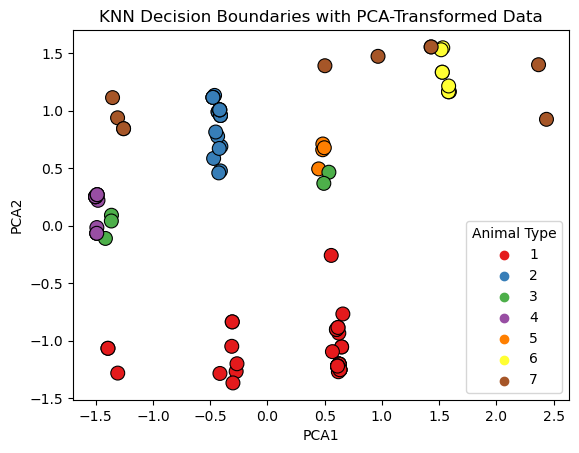

In [33]:
sns.scatterplot(x=x_scaled[:, 0], y=x_scaled[:, 1], hue=y, palette='Set1', s=100, edgecolor='k')
plt.title('KNN Decision Boundaries with PCA-Transformed Data')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Animal Type')
plt.show()

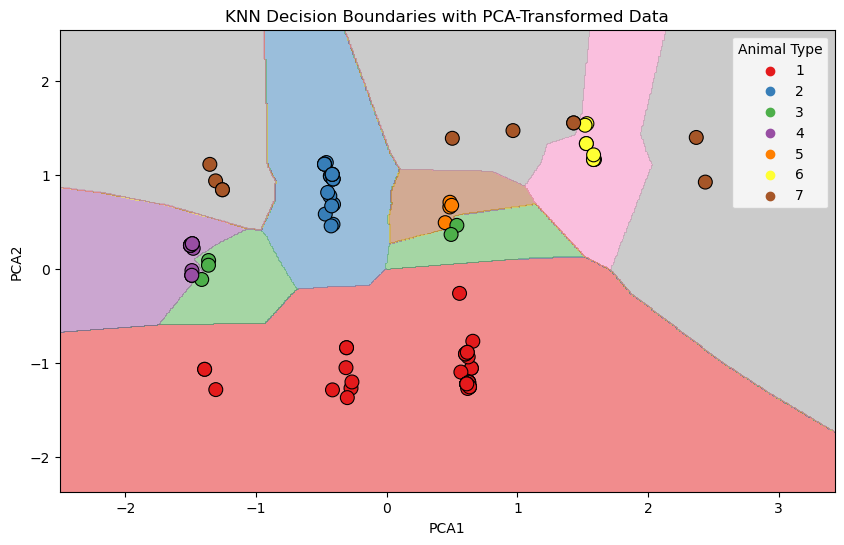

In [34]:
# Overlay the data points on decision boundary
plt.figure(figsize=(10,6))
plt.contourf(xx, yy, z, alpha=0.5, cmap=plt.cm.Set1)
sns.scatterplot(x=x_scaled[:, 0], y=x_scaled[:, 1], hue=y, palette='Set1', s=100, edgecolor='k')
plt.title('KNN Decision Boundaries with PCA-Transformed Data')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Animal Type')
plt.show()

### Interview Questions:

#### 1. What are the key hyperparameters in KNN?

#### 2. What distance metrics can be used in KNN?